# Processamento de Imagens em Python: scikit-image

![](python-logo.png)
![](logo.png)


# O que é uma imagem?

![](pdi.png)

### Como ler uma imagem

In [1]:
#importar a funcao imread da biblioteca skimage
# pip install scikit-image
from skimage.io import imread

In [103]:
#ler imagem
imagem = imread('lenna.jpg')

In [104]:
imagem.shape

(220, 220, 3)

### Como mostrar uma imagem

In [105]:
#importar a biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

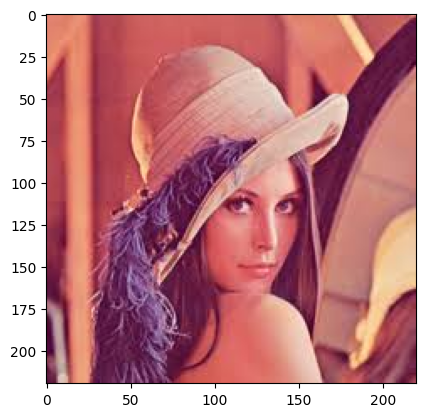

In [106]:
plt.imshow(imagem)

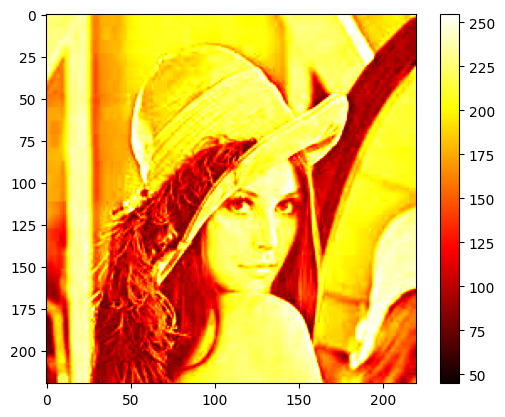

In [233]:
plt.imshow(imagem[:,:,0], cmap='hot') #mapa de calor: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.colorbar() # Escala de cor:

### Informações da Imagem

In [6]:
#dimensões
dim = imagem.shape

In [7]:
dim

(220, 220, 3)

### Trabalhando com Imagens Coloridas (RGB)
![](rgb.png)

In [8]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]

In [14]:
blue.shape

(220, 220)

### Mostrar várias imagens

Text(0.5, 1.0, 'Canal Blue do Sistema de Cores RGB')

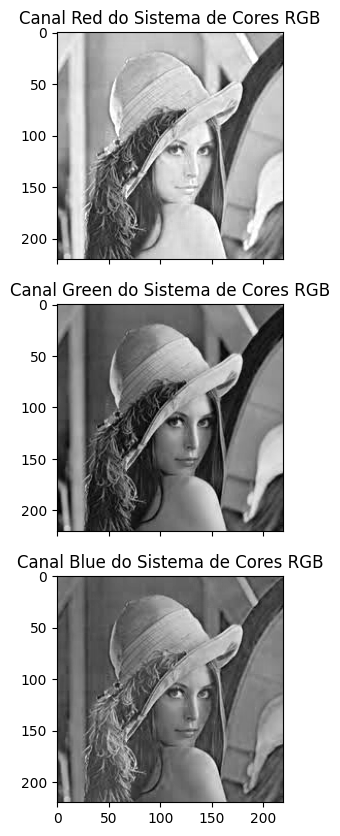

In [22]:
fig, ax = plt.subplots(3,1,figsize=(10, 10),sharex=True)
ax[0].imshow(red,cmap = 'gray')
ax[0].set_title('Canal Red do Sistema de Cores RGB')
ax[1].imshow(green,cmap = 'gray')
ax[1].set_title('Canal Green do Sistema de Cores RGB')
ax[2].imshow(blue,cmap = 'gray')
ax[2].set_title('Canal Blue do Sistema de Cores RGB')

### Níveis de cinza

$Y = 0.2125 R + 0.7154 G + 0.0721 B$

In [23]:
from skimage.color import rgb2gray

In [24]:
cinza = rgb2gray(imagem)

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

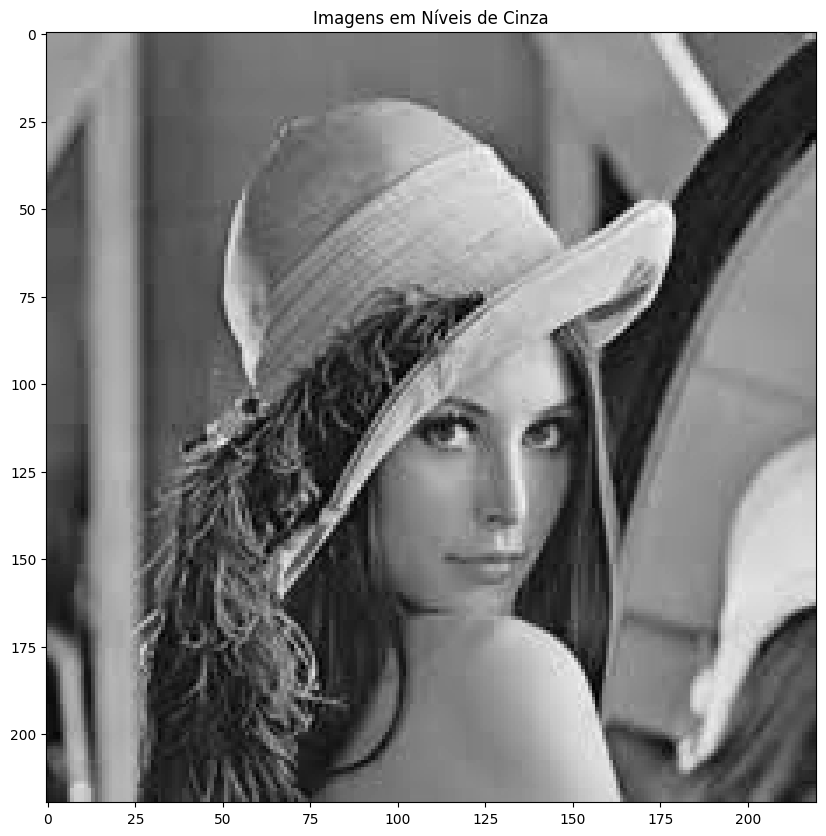

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(cinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

### Salvar resultado

In [48]:
#importar a funcao imsave da biblioteca skimage
from skimage.io import imsave
from skimage import img_as_ubyte

In [49]:
cinza_uint8 = img_as_ubyte(cinza)
imsave('cinza.png',cinza_uint8)

### Outros modelos de cor

In [77]:
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from skimage.color import rgb2yuv

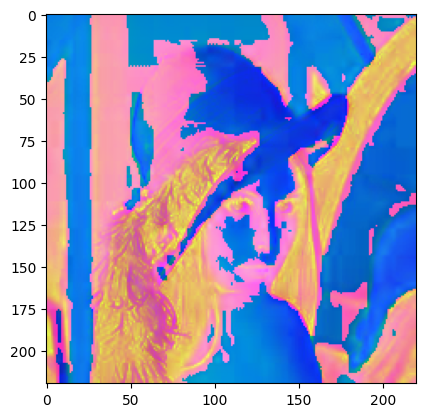

In [82]:
outromodelodecor = rgb2hsv(imagem)
plt.imshow(outromodelodecor)

## Atividade

- Leia uma imagem
- Crie variáveis para armazenar cada componente do RGB
- Salve cada imagem em disco

### Remoção de Ruídos

In [50]:
#importar função com filtro da mediana
from skimage.restoration import denoise_nl_means

In [74]:
cinza_filter = denoise_nl_means(cinza,20)

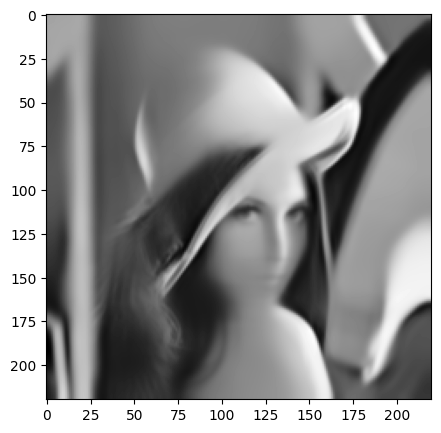

In [75]:
plt.figure(figsize=(5,5))
plt.imshow(cinza_filter,cmap = 'gray')

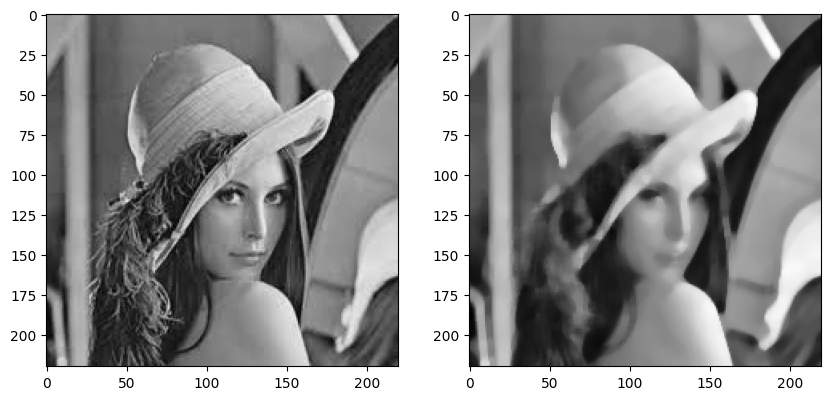

In [86]:
from skimage.filters import median
from skimage.morphology import square

im_filtrada = median(cinza,square(7))

_, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(cinza,cmap='gray')
ax[1].imshow(im_filtrada,cmap='gray')

# Atividade: 

- Aplique o filtro da mediana em uma imagem de sua escolha com o tamanho de janela variando entre 3 e 13
- Plot os resultados e compare com a imagem original
- Analise os resultados obtidos

### Percorendo uma imagem

In [91]:
imagem.shape

(220, 220, 3)

In [87]:
linhas,colunas,dimensao = imagem.shape #pegar dimensoes da imagem

In [108]:
for l in range(linhas):
    for c in range(colunas):
        if (imagem[l,c,1] < 150):
            imagem[l,c,1] = 0

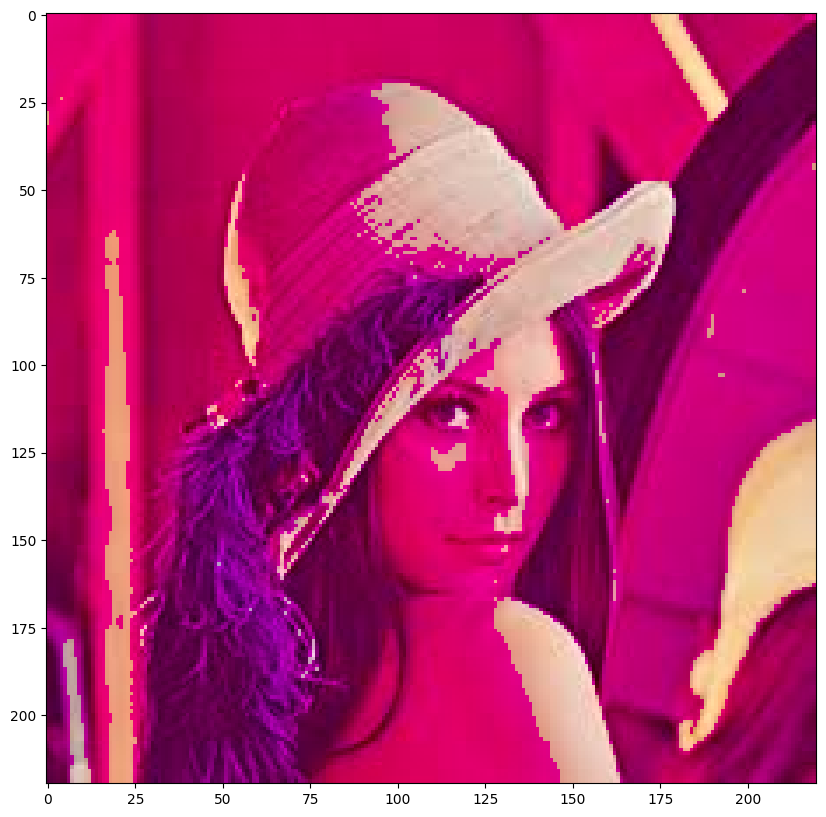

In [118]:
plt.figure(figsize=(10,10))
plt.imshow(imagem)

## Atividade 
- Percorra sua imagem e ache o pixel com maior valor em cada uma das componentes


# Imagens Preto e Branco

In [119]:
import numpy as np
from skimage.filters import threshold_otsu

In [171]:
#método de Otsu
otsu = threshold_otsu(cinza)
preto_branco = cinza < otsu

In [172]:
otsu

0.4353133938419118

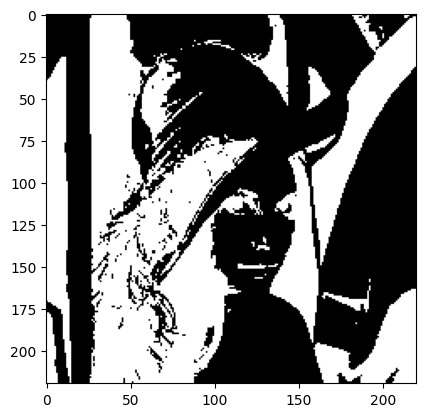

In [175]:
plt.imshow(preto_branco,cmap = 'gray')

# Atividade
- Faça uma binarização na imagem variando o limiar entre 0 e 1 com passos de 0.2
- Plot os resultados

In [183]:
# fig, ax = plt.subplots(7,1,figsize = (30,30),sharex=True)
# ax[0].imshow(cinza,cmap = 'gray')
# ax[0].set_title('Imagem Cinza')
# for idx,thr in enumerate(np.arange(0,1.1,0.2)):
#     binaria = cinza < thr
#     ax[idx+1].imshow(binaria,cmap = 'gray')
#     ax[idx+1].set_title('Imagem filtrada com janela '+str(thr))

### Encontrando Bordas

In [184]:
from skimage.filters import sobel,roberts,prewitt,scharr

In [193]:
contorno = sobel(preto_branco)

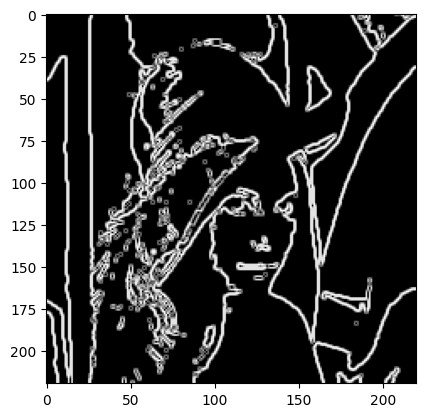

In [194]:
plt.imshow(contorno,cmap = 'gray')

## Atividade
- Transforme uma imagem para preto e branco
- Utilize outros métodos que não seja o de Sobel para encontrar as bordas. Ex: scharr, prewitt e roberts
- Faça um plot com todos os métodos que você utilizou

### Recortes em Imagens

In [207]:
imagem = imread('lenna.jpg')
imagem.shape

(220, 220, 3)

In [216]:
recorte_imagem = imagem[60:170,80:160,:]

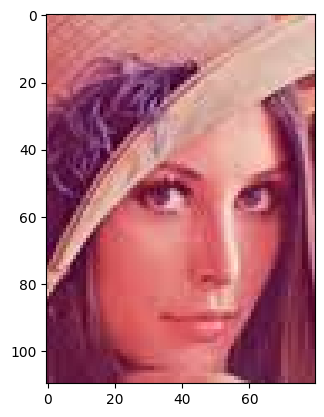

In [217]:
plt.imshow(recorte_imagem)